In [2]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import matplotlib.pyplot as plt
import h5py
import time
import illustris_python_mod as il
import sys
import os
sys.path.append('../BH_dynamics_analysis')
sys.path.append('/home/pranavsatheesh/arepo_package/')
import arepo_package as arepo
from scipy.spatial import cKDTree
import BRAHMA_python as il_brahma
from tqdm import tqdm
import datetime
from scipy.spatial import cKDTree
from scipy.stats import ks_2samp

In [3]:
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path
import scienceplots
plt.style.use('science')

In [4]:
pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/' 
basePath="/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3/"

In [5]:
simName = basePath.split('/')[-2]

In [6]:
def load_pop_file(basePath,pop_file_path,minN_values):
    #
    pop_file_name = pop_file_path+'population_sort'+'_gas-'+f'{minN_values[0]:03d}'+'_dm-'+f'{minN_values[1]:03d}'+'_star-'+f'{minN_values[2]:03d}'+'_bh-'+f'{minN_values[3]:03d}'+'_brahma.hdf5'

    return h5py.File(pop_file_name,'r')

In [7]:
brahma_pop_Nstar100 =load_pop_file(basePath,pop_file_path,[0,0,100,0])
brahma_pop_Nstar0 =load_pop_file(basePath,pop_file_path,[0,0,0,0])
brahma_pop_Nstar10 = load_pop_file(basePath,pop_file_path,[0,0,10,0])
brahma_pop_Nstar0_bh1 = load_pop_file(basePath,pop_file_path,[0,0,0,1])

In [54]:
print(brahma_pop_Nstar10['merging_population'].keys())

<KeysViewHDF5 ['MBH', 'Mdot', 'Mgas', 'Mgas-half', 'Mstar', 'Mstar-half', 'Msubhalo', 'SFR', 'snap', 'subhalo_ids', 'z']>


In [9]:
simName

'output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_DFD_3'

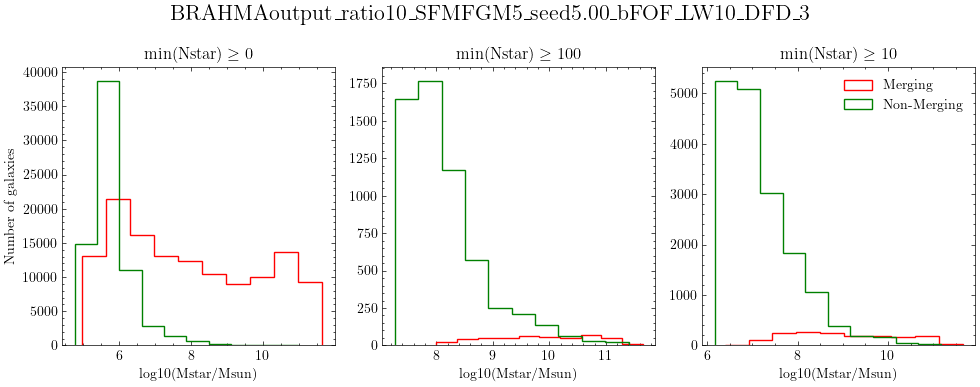

In [10]:
fig,axes = plt.subplots(1,3,figsize=[10,4])
axes[0].hist(np.log10(brahma_pop_Nstar0['merging_population']['Mstar'][brahma_pop_Nstar0['merging_population']['Mstar'][:]>0]),bins=10,histtype='step',color='red',label='Merging')
axes[0].hist(np.log10(brahma_pop_Nstar0['non_merging_population']['Mstar'][brahma_pop_Nstar0['non_merging_population']['Mstar'][:]>0]),bins=10,histtype='step',color='green',label='Non-Merging')
axes[0].set_xlabel('log10(Mstar/Msun)')
axes[0].set_ylabel('Number of galaxies')
axes[0].set_title(r'$\rm min(Nstar)\geq0$')


axes[1].hist(np.log10(brahma_pop_Nstar100['merging_population']['Mstar'][brahma_pop_Nstar100['merging_population']['Mstar'][:]>0]),bins=10,histtype='step',color='red',label='Merging')
axes[1].hist(np.log10(brahma_pop_Nstar100['non_merging_population']['Mstar'][brahma_pop_Nstar100['non_merging_population']['Mstar'][:]>0]),bins=10,histtype='step',color='green',label='Non-Merging Nstar>100')

axes[1].set_xlabel('log10(Mstar/Msun)')
axes[1].set_title(r'$\rm min(Nstar)\geq100$')

axes[2].hist(np.log10(brahma_pop_Nstar10['merging_population']['Mstar'][brahma_pop_Nstar10['merging_population']['Mstar'][:]>0]),bins=10,histtype='step',color='red',label='Merging')
axes[2].hist(np.log10(brahma_pop_Nstar10['non_merging_population']['Mstar'][brahma_pop_Nstar10['non_merging_population']['Mstar'][:]>0]),bins=10,histtype='step',color='green',label='Non-Merging')
axes[2].set_xlabel('log10(Mstar/Msun)')
axes[2].legend(loc="upper right")
axes[2].set_title(r'$\rm min(Nstar)\geq10$')



fig.suptitle('BRAHMA'+simName,fontsize=16)
fig.tight_layout()


In [11]:
brahma_pop_Nstar0['merging_population']['Msubhalo'][:]

array([8.79367382e+07, 1.13516439e+08, 1.23125739e+08, ...,
       4.65547794e+07, 5.43139070e+07, 4.96584318e+07])

In [12]:
np.sum(brahma_pop_Nstar0['merging_population']['Mstar'][:]==0)/len(brahma_pop_Nstar0['merging_population']['Mstar'][:]),np.sum(brahma_pop_Nstar0['non_merging_population']['Mstar'][:]==0)/len(brahma_pop_Nstar0['non_merging_population']['Mstar'][:])

(0.3785672263639608, 0.9605492152575851)

Text(0.5, 0.98, '$\\rm min(Nstar)\\geq0$')

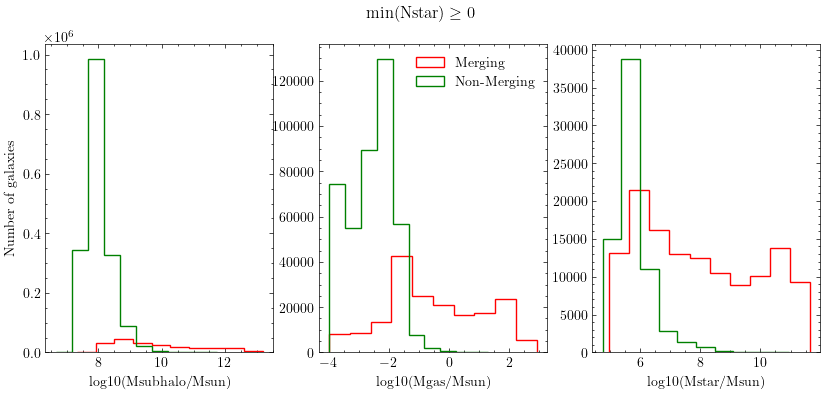

In [13]:
fig,axes = plt.subplots(1,3,figsize=[10,4])
axes[0].hist(np.log10(brahma_pop_Nstar0['merging_population']['Msubhalo']),histtype='step',color='red',label='Merging')
axes[0].hist(np.log10(brahma_pop_Nstar0['non_merging_population']['Msubhalo']),histtype='step',color='green',label='Non-Merging')
axes[0].set_xlabel('log10(Msubhalo/Msun)')
axes[0].set_ylabel('Number of galaxies')
#axes[0].legend(loc='upper right')

axes[1].hist(np.log10(brahma_pop_Nstar0['merging_population']['Mgas'][brahma_pop_Nstar0['merging_population']['Mgas'][:]>0]),histtype='step',color='red',label='Merging')
axes[1].hist(np.log10(brahma_pop_Nstar0['non_merging_population']['Mgas'][brahma_pop_Nstar0['non_merging_population']['Mgas'][:]>0]),histtype='step',color='green',label='Non-Merging')
axes[1].set_xlabel('log10(Mgas/Msun)')
axes[1].legend(loc='upper right')

axes[2].hist(np.log10(brahma_pop_Nstar0['merging_population']['Mstar'][brahma_pop_Nstar0['merging_population']['Mstar'][:]>0]),bins=10,histtype='step',color='red',label='Merging')
axes[2].hist(np.log10(brahma_pop_Nstar0['non_merging_population']['Mstar'][brahma_pop_Nstar0['non_merging_population']['Mstar'][:]>0]),bins=10,histtype='step',color='green',label='Non-Merging')
axes[2].set_xlabel('log10(Mstar/Msun)') 
#axes[2].legend(loc="upper right")

fig.suptitle(r'$\rm min(Nstar)\geq0$')

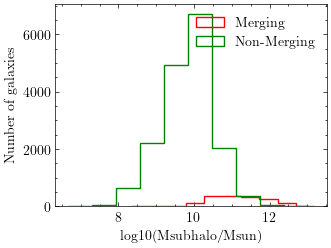

In [14]:
plt.hist(np.log10(brahma_pop_Nstar10['merging_population']['Msubhalo']),histtype='step',color='red',label='Merging')
plt.hist(np.log10(brahma_pop_Nstar10['non_merging_population']['Msubhalo']),histtype='step',color='green',label='Non-Merging')
plt.xlabel('log10(Msubhalo/Msun)')
plt.ylabel('Number of galaxies')
plt.legend(loc='upper right')


#plt.title('BRAHMA'+simName)

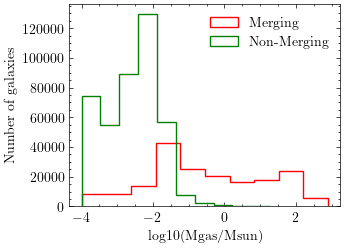

In [15]:
plt.hist(np.log10(brahma_pop_Nstar0['merging_population']['Mgas'][brahma_pop_Nstar0['merging_population']['Mgas'][:]>0]),histtype='step',color='red',label='Merging')
plt.hist(np.log10(brahma_pop_Nstar0['non_merging_population']['Mgas'][brahma_pop_Nstar0['non_merging_population']['Mgas'][:]>0]),histtype='step',color='green',label='Non-Merging')
plt.xlabel('log10(Mgas/Msun)')
plt.ylabel('Number of galaxies')
plt.legend(loc='upper right')

In [16]:
np.sum(brahma_pop_Nstar0['merging_population']['Mgas'][:]==0)/len(brahma_pop_Nstar0['merging_population']['Mgas'][:]) * 100

12.344845544764532

In [17]:
brahma_pop_Nstar0['merging_population'].keys()

<KeysViewHDF5 ['MBH', 'Mdot', 'Mgas', 'Mgas-half', 'Mstar', 'Mstar-half', 'Msubhalo', 'SFR', 'snap', 'subhalo_ids', 'z']>

(array([ 8208.,  8445., 13576., 42704., 24894., 20760., 16604., 17470.,
        23554.,  5559.]),
 array([-3.99909194, -3.30865901, -2.61822608, -1.92779315, -1.23736022,
        -0.54692729,  0.14350564,  0.83393857,  1.52437149,  2.21480442,
         2.90523735]),
 [<matplotlib.patches.Polygon at 0x1460314a63b0>])

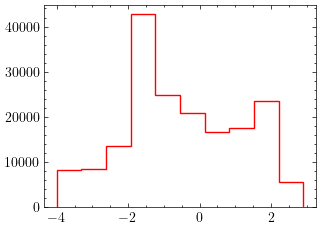

In [18]:
plt.hist(np.log10(brahma_pop_Nstar0['merging_population']['Mgas'][:][brahma_pop_Nstar0['merging_population']['Mgas'][:]>0]),bins=10,histtype='step',color='red',label='Merging')
# plt.xscale('log')

In [19]:
pop_file_loc = "/home/pranavsatheesh/host_galaxies/data/population_files/new/"
#pop_file = pop_file_loc + "population_sort_gas-100_dm-100_star-100_bh-001_w_rsep_cut_1bh.hdf5"
pop_file_1000 = pop_file_loc + "population_sort_gas-000_dm-000_star-1000_bh-000_w_rsep_cut_1bh.hdf5"
# pop_file = pop_file_loc + "population_sort_gas-100_dm-100_star-100_bh-001_w_rsep_cut.hdf5"
pop_file_100 = pop_file_loc + "population_sort_gas-100_dm-100_star-100_bh-001_w_rsep_cut_1bh.hdf5"
#pop_100 = h5py.File(pop_file_100, 'r')
#pop_1000 = h5py.File(pop_file_1000, 'r')

#TNG50_pop_Nstar100 = h5py.File(pop_100,'r')
TNG50_pop_Nstar1000 = h5py.File(pop_file_100,'r')

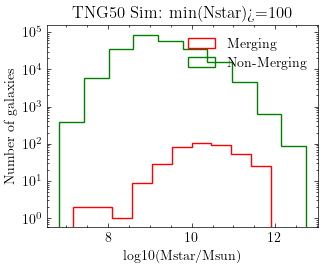

In [20]:
plt.hist(np.log10(TNG50_pop_Nstar1000['merging_population']['Mstar'][TNG50_pop_Nstar1000['merging_population']['Mstar'][:]>0]),bins=10,histtype='step',color='red',label='Merging')
plt.hist(np.log10(TNG50_pop_Nstar1000['non_merging_population']['Mstar'][TNG50_pop_Nstar1000['non_merging_population']['Mstar'][:]>0]),bins=10,histtype='step',color='green',label='Non-Merging')
plt.xlabel('log10(Mstar/Msun)')
plt.ylabel('Number of galaxies')
plt.yscale('log')
plt.xlabel('log10(Mstar/Msun)')
plt.title('TNG50 Sim: min(Nstar)>=100')
plt.legend(loc="upper right")
plt.show()

In [21]:
brahma_mergers_Mstar = brahma_pop_Nstar10['merging_population']['Mstar']
brahma_mergers_z = brahma_pop_Nstar10['merging_population']['z']

brahma_nonmergers_Mstar = brahma_pop_Nstar10['non_merging_population']['Mstar']
brahma_nonmergers_z = brahma_pop_Nstar10['non_merging_population']['z']

In [22]:
merging_points = np.column_stack((brahma_mergers_z,np.log10(brahma_mergers_Mstar)))
non_merging_points = np.column_stack((brahma_nonmergers_z,np.log10(brahma_nonmergers_Mstar)))
tree = cKDTree(non_merging_points)
used = np.zeros(len(non_merging_points), dtype=bool)

control_indices = []

while True:
    closest_indices = np.full(len(merging_points), -1)
    
    tolerances = []
    for i in tqdm(range(len(merging_points)), desc="Processing merging points", ncols=100):
        #find the closest neibhour 
        dist, min_idx = tree.query(merging_points[i])
        if(used[min_idx]):
            dists,idxs = tree.query(merging_points[i],k=len(non_merging_points))
            min_idx = idxs[np.where(~used[idxs])[0][0]] 

        #check for tolerance:
        del_z = np.abs(merging_points[i][0]-non_merging_points[min_idx][0])
        dex_Mstar = np.abs(np.log10(merging_points[i][1]/non_merging_points[min_idx][1]))

        z_tolerance = 0.1
        Mstar_dex_tolerance = 0.01

        while True:
            if(del_z<z_tolerance and dex_Mstar<Mstar_dex_tolerance):
                used[min_idx] = True
                closest_indices[i] = min_idx
                tolerances.append((z_tolerance, Mstar_dex_tolerance))
                break
            else:
                closest_indices[i] = -1
                break

                

    control_indices.append(closest_indices)
        #D_mstar, p_Mstar = ks_2samp(pop['non_merging_population']['Mstar'][np.sort(closest_indices)],pop['merging_population']['Mstar'])
        #D_z, p_z = ks_2samp(pop['non_merging_population']['z'][np.sort(closest_indices)],pop['merging_population']['z'])
        
        #print(p_z,p_Mstar,np.shape(control_indices)[0])
        #print(z_tolerance,Mstar_dex_tolerance)

    if np.shape(control_indices)[0]>=1:
        break

Processing merging points:   0%|                                           | 0/1614 [00:00<?, ?it/s]

Processing merging points: 100%|██████████████████████████████| 1614/1614 [00:01<00:00, 1071.76it/s]


In [35]:
print("Number of cases where a close enough match is not found wit" \
"hin the acceptable tolerance:",np.sum(control_indices[0]==-1))

Number of cases where a close enough match is not found within the acceptable tolerance: 598


Text(0.5, 0.98, 'Cases where a good control not found')

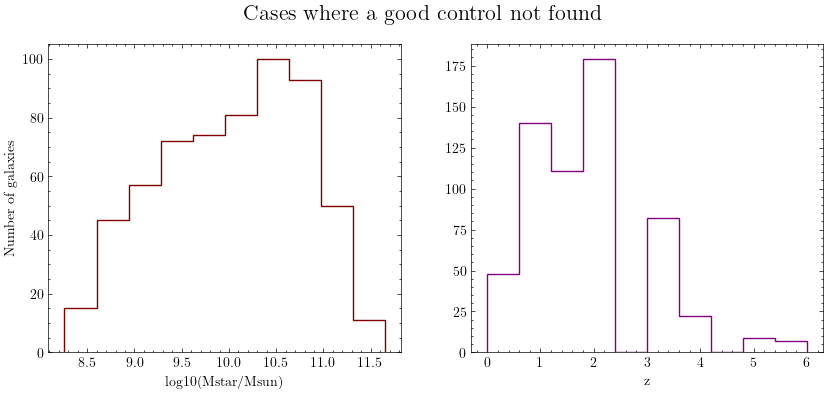

In [50]:
fig,axes = plt.subplots(1,2,figsize=[10,4])
axes[0].hist(np.log10(brahma_pop_Nstar10['merging_population']['Mstar'][control_indices[0]==-1]),histtype='step',color='maroon',label='Merging')
axes[0].set_xlabel('log10(Mstar/Msun)')
axes[0].set_ylabel('Number of galaxies')
axes[1].hist(brahma_pop_Nstar10['merging_population']['z'][control_indices[0]==-1],histtype='step',color='purple')
axes[1].set_xlabel('z')
plt.suptitle('Cases where a good control not found',fontsize=16)

In [34]:
mergers_with_MBH_not_zero = brahma_pop_Nstar10['merging_population']['MBH'] != 0 
mergers_with_Mstar_not_zero = brahma_pop_Nstar10['merging_population']['Mstar'] != 0
mergers_with_controls_found = control_indices[0] != -1
valid_control_mask = mergers_with_MBH_not_zero & mergers_with_Mstar_not_zero & mergers_with_controls_found

print("number of processable mergers with valid controls:")
print(len(control_indices[0][valid_control_mask]))

number of processable mergers with valid controls:
1016


Text(0, 0.5, 'pdf')

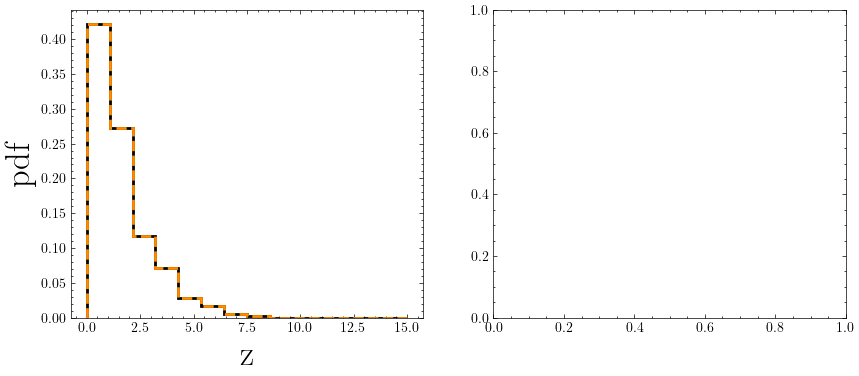

In [53]:
Mstar_binsize = 0.5
Mstar_min = 7
Mstar_max = 12
Nbins_Ms = int((Mstar_max - Mstar_min) / Mstar_binsize)
Mstar_bins = np.linspace(Mstar_min, Mstar_max, Nbins_Ms)

z_binsize = 1
z_min = 0
z_max = 15
Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z )

fig,ax = plt.subplots(1,2,figsize=(10,4))


merging_z = brahma_pop_Nstar10['merging_population']['z'][:][valid_control_mask]
control_z = brahma_pop_Nstar10['non_merging_population']['z'][:][control_indices[0][valid_control_mask]]

ax[0].hist(control_z, bins=z_bins, color="black", histtype="step",linewidth=2,density=True)
ax[0].hist(merging_z, bins=z_bins, histtype="step",color="Darkorange",linestyle="--",linewidth=2,density=True)
ax[0].set_xlabel("z",fontsize=25)
ax[0].set_ylabel("pdf",fontsize=25)

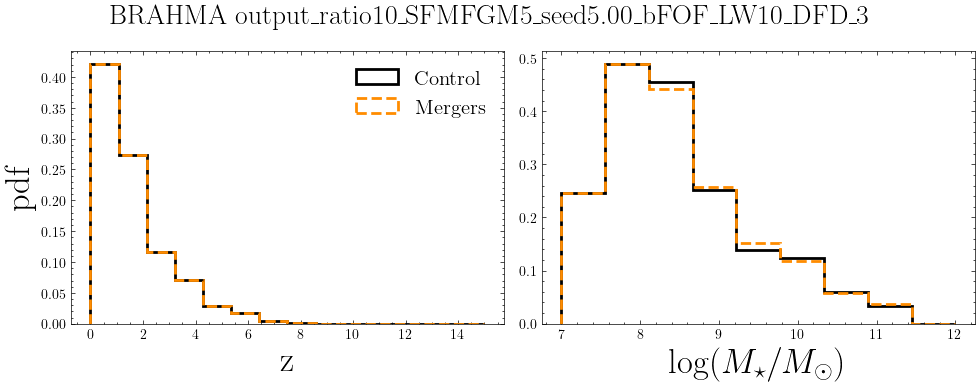

In [25]:
Mstar_binsize = 0.5
Mstar_min = 7
Mstar_max = 12
Nbins_Ms = int((Mstar_max - Mstar_min) / Mstar_binsize)
Mstar_bins = np.linspace(Mstar_min, Mstar_max, Nbins_Ms)

z_binsize = 1
z_min = 0
z_max = 15
Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z )

fig,ax = plt.subplots(1,2,figsize=(10,4))

ax[0].hist(brahma_nonmergers_z[:][control_indices[0][valid_control_mask]], bins=z_bins, color="black", histtype="step",linewidth=2,density=True,label="Control")
ax[0].hist(brahma_mergers_z[valid_control_mask], bins=z_bins, histtype="step",color="Darkorange",linestyle="--",linewidth=2,density=True,label="Mergers")
ax[0].set_xlabel("z",fontsize=25)
ax[0].set_ylabel("pdf",fontsize=25)
ax[0].legend(fontsize=15)
#ax[0].set_xticks([0,1,2,3,4,5])
ax[1].hist(np.log10(brahma_nonmergers_Mstar[:][control_indices[0][valid_control_mask]]), bins=Mstar_bins,histtype="step",color="black",label="Control",linewidth=2,density=True)
ax[1].hist(np.log10(brahma_mergers_Mstar[valid_control_mask]),bins=Mstar_bins,histtype="step",label="PM",color="Darkorange",linestyle="--",linewidth=2,density=True)
ax[1].set_xticks([7,8,9,10,11,12])

ax[1].set_xlabel("$\log(M_{\star}/M_{\odot})$",fontsize=25)

fig.suptitle("BRAHMA "+simName,fontsize=20)
fig.tight_layout()
fig.savefig("../figures/control_sample_analysis_w_brahma_galaxy_mergers_"+simName+".pdf",dpi=300)

In [28]:
z_merging_pop = brahma_pop_Nstar10['merging_population']['z'][:][valid_control_mask]
z_control_pop = brahma_pop_Nstar10['non_merging_population']['z'][:][control_indices[0][valid_control_mask]]

Mstar_merging_pop = brahma_pop_Nstar10['merging_population']['Mstar'][:][valid_control_mask]
Mstar_control_pop = brahma_pop_Nstar10['non_merging_population']['Mstar'][:][control_indices[0][valid_control_mask]]

MBH_merging_pop = brahma_pop_Nstar10['merging_population']['MBH'][:][valid_control_mask]
MBH_control_pop = brahma_pop_Nstar10['non_merging_population']['MBH'][:][control_indices[0][valid_control_mask]]
SFR_merging_pop = brahma_pop_Nstar10['merging_population']['SFR'][:][valid_control_mask]
SFR_control_pop = brahma_pop_Nstar10['non_merging_population']['SFR'][:][control_indices[0][valid_control_mask]]

sSFR_merging_pop = SFR_merging_pop/Mstar_merging_pop
sSFR_control_pop = SFR_control_pop/Mstar_control_pop

Mgas_merging_pop = brahma_pop_Nstar10['merging_population']['Mgas'][:][valid_control_mask]
Mgas_control_pop = brahma_pop_Nstar10['non_merging_population']['Mgas'][:][control_indices[0][valid_control_mask]]

# fgas_merging_pop = Mgas_merging_pop/(Mgas_merging_pop+Mstar_merging_pop)
# fgas_control_pop = Mgas_control_pop/(Mgas_control_pop+Mstar_control_pop)
Mdot_merging_pop = brahma_pop_Nstar10['merging_population']['Mdot'][:][valid_control_mask]
Mdot_control_pop = brahma_pop_Nstar10['non_merging_population']['Mdot'][:][control_indices[0][valid_control_mask]]

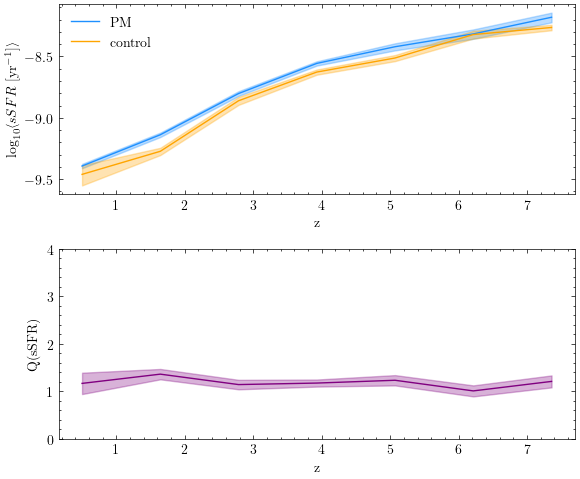

In [33]:
z_min = 0
z_max = 8
z_binsize = 1

Nbins_z = int((z_max - z_min) / z_binsize)
z_bins = np.linspace(z_min, z_max, Nbins_z)

avg_sSFR_control = []
std_sSFR_control = []

avg_sSFR_merger = []
std_sSFR_merger = []

# Loop through redshift bins
for i in range(len(z_bins) - 1):
    # Create masks for merging and control populations within each redshift bin
    merger_z_mask = (z_merging_pop > z_bins[i]) & (z_merging_pop < z_bins[i + 1])
    control_z_mask = (z_control_pop > z_bins[i]) & (z_control_pop < z_bins[i + 1])

    sSFR_merging_pop_filtered = sSFR_merging_pop[merger_z_mask]
    sSFR_control_pop_filtered = sSFR_control_pop[control_z_mask]

    avg_sSFR_merger.append(np.mean(sSFR_merging_pop_filtered))
    std_sSFR_merger.append(np.std(sSFR_merging_pop_filtered) / np.sqrt(len(sSFR_merging_pop_filtered)))

    avg_sSFR_control.append(np.mean(sSFR_control_pop_filtered))
    std_sSFR_control.append(np.std(sSFR_control_pop_filtered) / np.sqrt(len(sSFR_control_pop_filtered)))

avg_sSFR_merger = np.array(avg_sSFR_merger)
std_sSFR_merger = np.array(std_sSFR_merger)

avg_sSFR_control = np.array(avg_sSFR_control)
std_sSFR_control = np.array(std_sSFR_control)

Q_sSFR = avg_sSFR_merger / avg_sSFR_control
Q_sSFR_SE = Q_sSFR * np.sqrt((std_sSFR_merger / avg_sSFR_merger) ** 2 + (std_sSFR_control / avg_sSFR_control) ** 2)

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(6, 5))
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_merger[avg_sSFR_merger > 0]), label='PM', color="dodgerblue")
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_merger - std_sSFR_merger), np.log10(avg_sSFR_merger + std_sSFR_merger), alpha=0.3, color='dodgerblue')
ax[0].plot(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_control[avg_sSFR_control > 0]), label='control', color='orange')
ax[0].fill_between(z_bins[:-1] + z_binsize / 2, np.log10(avg_sSFR_control - std_sSFR_control), np.log10(avg_sSFR_control + std_sSFR_control), alpha=0.3, color='orange')
ax[0].legend()
ax[0].set_xlabel('z')
ax[0].set_ylabel(r'$\log_{10}\langle sSFR \; [\mathrm{yr}^{-1}]\rangle$')

ax[1].plot(z_bins[:-1] + z_binsize / 2, Q_sSFR, color='purple')
ax[1].fill_between(z_bins[:-1] + z_binsize / 2, Q_sSFR - Q_sSFR_SE, Q_sSFR + Q_sSFR_SE, alpha=0.3, color='purple')
ax[1].set_xlabel('z')
ax[1].set_ylabel('Q(sSFR)')
ax[1].set_ylim(0, 4)

# Final layout adjustments
fig.tight_layout()